In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import cm
import matplotlib.pyplot as plt
import glob

In [2]:
# Make sure cuda is available
import torch
torch.cuda.is_available()

/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [6]:
!ls ../eval_embedding/contrast/P6test

00.1l.npy   20.2r.npy	320.4l.npy  440.5r.npy	560.7l.npy  690.1r.npy
00.1r.npy   20.3l.npy	320.4r.npy  440.6l.npy	560.7r.npy  690.2l.npy
00.2l.npy   20.3r.npy	320.5l.npy  440.6r.npy	570.1l.npy  690.2r.npy
00.2r.npy   20.4l.npy	320.5r.npy  440.7l.npy	570.1r.npy  690.3l.npy
00.3l.npy   20.4r.npy	320.6l.npy  440.7r.npy	570.2l.npy  690.3r.npy
00.3r.npy   20.5l.npy	320.6r.npy  450.1l.npy	570.2r.npy  690.4l.npy
00.4l.npy   20.5r.npy	320.7l.npy  450.1r.npy	570.3l.npy  690.4r.npy
00.4r.npy   20.6l.npy	320.7r.npy  450.2l.npy	570.3r.npy  690.5l.npy
00.5l.npy   20.6r.npy	330.1l.npy  450.2r.npy	570.4l.npy  690.5r.npy
00.5r.npy   20.7l.npy	330.1r.npy  450.3l.npy	570.4r.npy  690.6l.npy
00.6l.npy   20.7r.npy	330.2l.npy  450.3r.npy	570.5l.npy  690.6r.npy
00.6r.npy   210.1l.npy	330.2r.npy  450.4l.npy	570.5r.npy  690.7l.npy
00.7l.npy   210.1r.npy	330.3l.npy  450.4r.npy	570.6l.npy  690.7r.npy
00.7r.npy   210.2l.npy	330.3r.npy  450.5l.npy	570.6r.npy  700.1l.npy
100.1l.npy  210.2r.npy	330.4l.npy  450.5r.npy

# IRM on 14 domains

## Eval embedding visualization

In [7]:
glob.glob('../eval_embedding/contrast/P6test/*.1l.npy')

['../eval_embedding/contrast/P6test/740.1l.npy',
 '../eval_embedding/contrast/P6test/390.1l.npy',
 '../eval_embedding/contrast/P6test/30.1l.npy',
 '../eval_embedding/contrast/P6test/430.1l.npy',
 '../eval_embedding/contrast/P6test/180.1l.npy',
 '../eval_embedding/contrast/P6test/510.1l.npy',
 '../eval_embedding/contrast/P6test/780.1l.npy',
 '../eval_embedding/contrast/P6test/00.1l.npy',
 '../eval_embedding/contrast/P6test/370.1l.npy',
 '../eval_embedding/contrast/P6test/540.1l.npy',
 '../eval_embedding/contrast/P6test/120.1l.npy',
 '../eval_embedding/contrast/P6test/210.1l.npy',
 '../eval_embedding/contrast/P6test/630.1l.npy',
 '../eval_embedding/contrast/P6test/490.1l.npy',
 '../eval_embedding/contrast/P6test/320.1l.npy',
 '../eval_embedding/contrast/P6test/620.1l.npy',
 '../eval_embedding/contrast/P6test/670.1l.npy',
 '../eval_embedding/contrast/P6test/690.1l.npy',
 '../eval_embedding/contrast/P6test/330.1l.npy',
 '../eval_embedding/contrast/P6test/70.1l.npy',
 '../eval_embedding/con

In [57]:
def get_eval_embed(inp='.1r', type='style_embedding'):
    embeds = []
    labels = []
    for file in glob.glob('../eval_embedding/contrast/P6test/*{}.npy'.format(inp)):
        # print(file)
        embedding = np.load(file, allow_pickle=True)
        # print(embedding[()].keys())
        embed = np.array(embedding[()][type])
        embed_dim = embed.shape[1]
        embed = embed.reshape(-1, embed_dim)
        embeds.append(embed)
    embeds = np.vstack(embeds)
    # print(embeds.shape)
    ev_embeds = embeds
    return ev_embeds
ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(2, axis=1)
ev_embed_1_l = get_eval_embed(inp='*.1l').repeat(2, axis=1)
ev_embed_2_l = get_eval_embed(inp='*.2l').repeat(2, axis=1)
ev_embed_2_r = get_eval_embed(inp='*.2r').repeat(2, axis=1)
ev_embed_3_l = get_eval_embed(inp='*.3l').repeat(2, axis=1)
ev_embed_3_r = get_eval_embed(inp='*.3r').repeat(2, axis=1)
ev_embed_4_r = get_eval_embed(inp='*.4r').repeat(2, axis=1)
ev_embed_4_l = get_eval_embed(inp='*.4l').repeat(2, axis=1)
ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(2, axis=1)
ev_embed_5_l = get_eval_embed(inp='*.5l').repeat(2, axis=1)
ev_embed_6_r = get_eval_embed(inp='*.6r').repeat(2, axis=1)
ev_embed_6_l = get_eval_embed(inp='*.6l').repeat(2, axis=1)
ev_embed_7_r = get_eval_embed(inp='*.7r').repeat(2, axis=1)
ev_embed_7_l = get_eval_embed(inp='*.7l').repeat(2, axis=1)

[0.62555933 0.24020539]


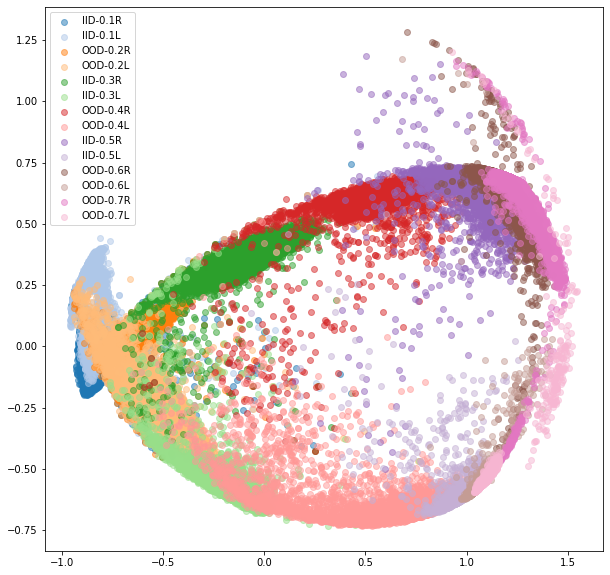

In [58]:
# fit a pca that projects to style embedding direction
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

pca = PCA(n_components=2)
pca.fit(eval_iid_embedding)
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()

In [64]:
ev_embed_1_r = get_eval_embed(inp='*.1r').repeat(2, axis=1)
# ev_embed_1_r = get_eval_embed(inp='*.1r', type='first_concat')
ev_embed_1_l = get_eval_embed(inp='*.1l', type='first_concat')
ev_embed_2_l = get_eval_embed(inp='*.2l', type='first_concat')
ev_embed_2_r = get_eval_embed(inp='*.2r', type='first_concat')
ev_embed_3_l = get_eval_embed(inp='*.3l', type='first_concat')
ev_embed_3_r = get_eval_embed(inp='*.3r', type='first_concat')
ev_embed_4_r = get_eval_embed(inp='*.4r', type='first_concat')
ev_embed_4_l = get_eval_embed(inp='*.4l', type='first_concat')
# ev_embed_5_r = get_eval_embed(inp='*.5r', type='first_concat')
ev_embed_5_r = get_eval_embed(inp='*.5r').repeat(2, axis=1)

ev_embed_5_l = get_eval_embed(inp='*.5l', type='first_concat')
ev_embed_6_r = get_eval_embed(inp='*.6r', type='first_concat')
ev_embed_6_l = get_eval_embed(inp='*.6l', type='first_concat')
ev_embed_7_r = get_eval_embed(inp='*.7r', type='first_concat')
ev_embed_7_l = get_eval_embed(inp='*.7l', type='first_concat')

[0.62555933 0.24020539]


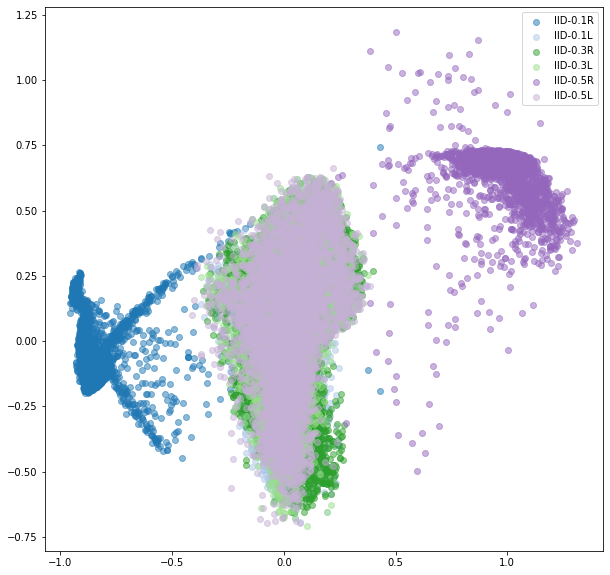

In [65]:
# plot concat embedding w.r.t style directions
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab not in [0, 1, 4, 5, 8, 9]:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()


[0.2731994 0.1928268]


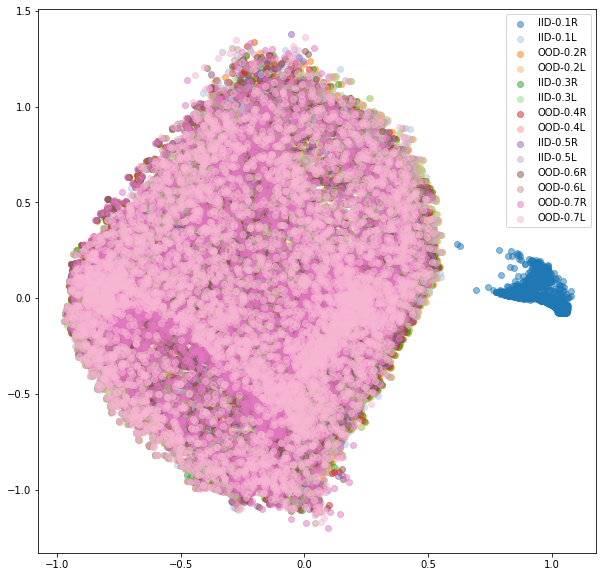

In [56]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

pca = PCA(n_components=2)
pca.fit(eval_iid_embedding)
pca_proj = pca.transform(eval_all_embedding)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab in []:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()


In [82]:
fig.savefig('pca-latent-full.png', dpi=300, bbox_inches="tight")

/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/motran/miniconda3/envs/motion/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.058s...
[t-SNE] Computed neighbors for 60000 samples in 4.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60000 but corresponding boolean dimension is 140000

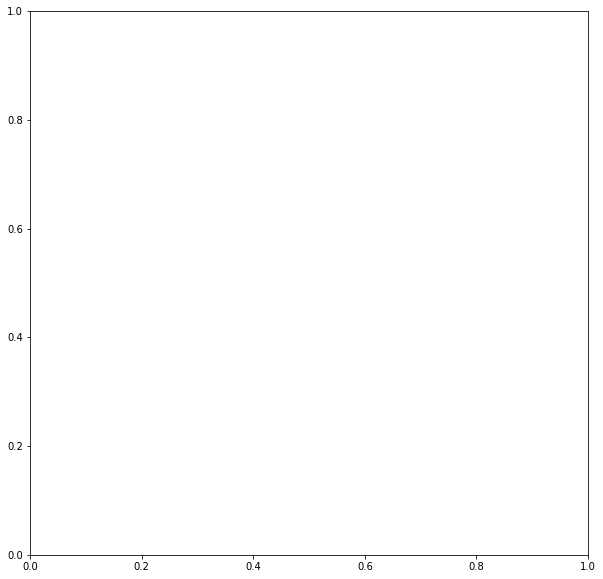

In [84]:
eval_iid_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_3_r, ev_embed_3_l, ev_embed_5_r, ev_embed_5_l])
eval_all_embedding = np.vstack([ev_embed_1_r, ev_embed_1_l, ev_embed_2_r, ev_embed_2_l, ev_embed_3_r, ev_embed_3_l, ev_embed_4_r, ev_embed_4_l, ev_embed_5_r, ev_embed_5_l, ev_embed_6_r, ev_embed_6_l, ev_embed_7_r, ev_embed_7_l])
ev_labels = np.arange(14).reshape(-1, 1)
eval_labels = np.repeat(ev_labels, ev_embed_1_r.shape[0])

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
# tsne.fit_transform(eval_iid_embedding)
pca_proj = tsne.fit_transform(eval_all_embedding)
print(pca_proj.shape)
# print(tsne.explained_variance_ratio_)
cmap = cm.get_cmap('tab20')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 14
legends = ['IID-0.1R', 'IID-0.1L', 'OOD-0.2R', 'OOD-0.2L', 'IID-0.3R', 'IID-0.3L', 'OOD-0.4R', 'OOD-0.4L', 'IID-0.5R', 'IID-0.5L', 'OOD-0.6R', 'OOD-0.6L', 'OOD-0.7R', 'OOD-0.7L']
for lab in range(num_categories):
    if lab not in [0, 1, 4, 5, 8, 9]:
        pass
    else:
        indices = eval_labels==lab
        ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)
plt.legend()


In [74]:
fig.savefig('tsne-style.png', dpi=300, bbox_inches="tight")

[0.64442956 0.26683533]


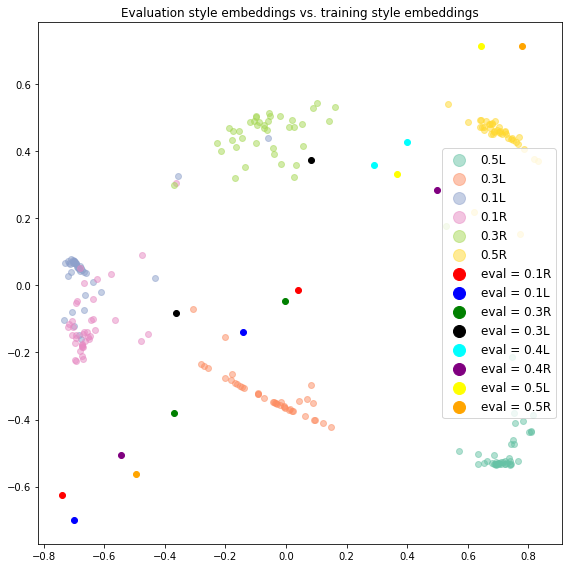

In [ ]:
embedding = np.load('embedding_vis/dual-irm/seed_5P6epoch_2152022_04_20-08:44:08.npy', allow_pickle=True)
embeddings = convert_cpu(embedding[()]['env_embeddings'])
embed_dim = embeddings.shape[2]
batch_num = embeddings.shape[1]
embeddings = embeddings.reshape(-1, embed_dim)
labels = convert_cpu(embedding[()]['label_embeddings'])
labels = np.repeat(labels, batch_num).reshape(labels.shape[0]*batch_num,)

pca = PCA(n_components=2)
pca.fit(embeddings)
pca_proj = pca.transform(embeddings)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('Set2')
fig, ax = plt.subplots(figsize=(8,8))
num_categories = 6
legends = ['0.5L', '0.3L', '0.1L', '0.1R', '0.3R', '0.5R']
for lab in range(num_categories):
    indices = labels==lab
    ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = legends[lab] ,alpha=0.5)

ax.set_title('Evaluation style embeddings vs. training style embeddings')
fig.tight_layout()

pca_eval_proj_1_r = pca.transform(ev_embed_1_r)
pca_eval_proj_1_l = pca.transform(ev_embed_1_l)
pca_eval_proj_3_r = pca.transform(ev_embed_3_r)
pca_eval_proj_3_l = pca.transform(ev_embed_3_l)
pca_eval_proj_4_r = pca.transform(ev_embed_4_r)
pca_eval_proj_4_l = pca.transform(ev_embed_4_l)
pca_eval_proj_5_l = pca.transform(ev_embed_5_l)
pca_eval_proj_5_r = pca.transform(ev_embed_5_r)
ax.scatter(pca_eval_proj_1_r[0],pca_eval_proj_1_r[1], c='red', label = 'eval = 0.1R' ,alpha=1)
ax.scatter(pca_eval_proj_1_l[0],pca_eval_proj_1_l[1], c='blue', label = 'eval = 0.1L' ,alpha=1)
ax.scatter(pca_eval_proj_3_r[0],pca_eval_proj_3_r[1], c='green', label = 'eval = 0.3R' ,alpha=1)
ax.scatter(pca_eval_proj_3_l[0],pca_eval_proj_3_l[1], c='black', label = 'eval = 0.3L' ,alpha=1)
ax.scatter(pca_eval_proj_4_l[0],pca_eval_proj_4_l[1], c='cyan', label = 'eval = 0.4L' ,alpha=1)
ax.scatter(pca_eval_proj_4_r[0],pca_eval_proj_4_r[1], c='purple', label = 'eval = 0.4R' ,alpha=1)
ax.scatter(pca_eval_proj_5_l[0],pca_eval_proj_5_l[1], c='yellow', label = 'eval = 0.5L' ,alpha=1)
ax.scatter(pca_eval_proj_5_r[0],pca_eval_proj_5_r[1], c='orange', label = 'eval = 0.5R' ,alpha=1)
ax.legend(fontsize='large', markerscale=2)
plt.show()
fig.savefig('embed comparison.pdf')

In [ ]:
# tsne = TSNE(2, verbose=1)
# tsne_proj = tsne.fit_transform(embeddings)
# # Plot those points as a scatter plot and label them based on the pred labels
# cmap = cm.get_cmap('tab20')
# fig, ax = plt.subplots(figsize=(8,8))
# num_categories = 3
# for lab in range(num_categories):
#     indices = labels==lab
#     ax.scatter(tsne_proj[indices,0],tsne_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = lab ,alpha=0.5)
# ax.legend(fontsize='large', markerscale=2)
# plt.show()

In [ ]:
embeds = []
labels = []
for file in glob.glob('embedding_vis/irm/seed_5P6470*.npy'):
    print(file)
    embedding = np.load(file, allow_pickle=True)
    embed = convert_cpu(embedding[()]['env_embeddings'])
    embed_dim = embed.shape[2]
    batch_num = embed.shape[1]
    embed = embed.reshape(-1, embed_dim)
    label = convert_cpu(embedding[()]['label_embeddings'])
    label = np.repeat(label, batch_num).reshape(label.shape[0]*batch_num,)
    embeds.append(embed)
    labels.append(label)
embeds = np.vstack(embeds)
labels = np.concatenate(labels)
pca = PCA(n_components=2)
pca.fit(embeds)

embedding_vis/irm/seed_5P64702022_04_19-03:07:14.npy
embedding_vis/irm/seed_5P64702022_04_19-03:07:12.npy
embedding_vis/irm/seed_5P64702022_04_19-03:07:31.npy
embedding_vis/irm/seed_5P64702022_04_19-03:07:11.npy
embedding_vis/irm/seed_5P64702022_04_19-03:07:34.npy
embedding_vis/irm/seed_5P64702022_04_19-03:07:27.npy
embedding_vis/irm/seed_5P64702022_04_19-03:07:26.npy
embedding_vis/irm/seed_5P64702022_04_19-03:07:13.npy


PCA(n_components=2)

In [ ]:
embeds = []
labels = []
for file in glob.glob('embedding_vis/irm/seed_5P4120*.npy'):
    print(file)
    embedding = np.load(file, allow_pickle=True)
    embed = convert_cpu(embedding[()]['env_embeddings'])
    embed_dim = embed.shape[2]
    batch_num = embed.shape[1]
    embed = embed.reshape(-1, embed_dim)
    label = convert_cpu(embedding[()]['label_embeddings'])
    label = np.repeat(label, batch_num).reshape(label.shape[0]*batch_num,)
    embeds.append(embed)
    labels.append(label)
embeds = np.vstack(embeds)
labels = np.concatenate(labels)

embedding_vis/irm/seed_5P41202022_04_19-11:47:57.npy


[0.9325007  0.06656396]


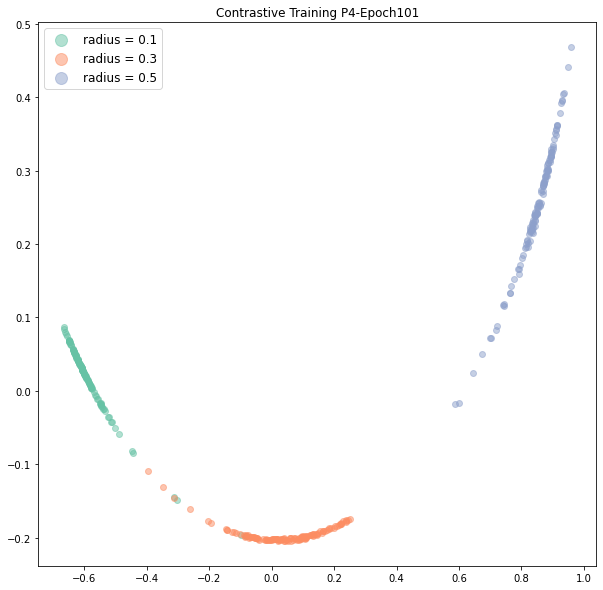

In [ ]:
pca_proj = pca.transform(embeds)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('Set2')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 3
legends = [0.1, 0.3, 0.5]
for lab in range(num_categories):
    indices = labels==lab
    ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = 'radius = '+str(legends[lab]) ,alpha=0.5)

# add eval embedding
    
ax.legend(fontsize='large', markerscale=2)
ax.set_title('Contrastive Training P4-Epoch101')
plt.show()

## Single style eval embedding

In [ ]:
embeds = []
labels = []
for file in glob.glob('embedding_vis/eval_embedding/*.3.npy'):
    print(file)
    embedding = np.load(file, allow_pickle=True)
    embed = np.array(embedding[()]['env_embeddings'])
    embed_dim = embed.shape[1]
    embed = embed.reshape(-1, embed_dim)
    embeds.append(embed)
embeds = np.vstack(embeds)
print(embeds.shape)
ev_embeds = embeds

embedding_vis/eval_embedding/70.3.npy
embedding_vis/eval_embedding/760.3.npy
embedding_vis/eval_embedding/500.3.npy
embedding_vis/eval_embedding/720.3.npy
embedding_vis/eval_embedding/710.3.npy
embedding_vis/eval_embedding/180.3.npy
embedding_vis/eval_embedding/700.3.npy
embedding_vis/eval_embedding/330.3.npy
embedding_vis/eval_embedding/100.3.npy
embedding_vis/eval_embedding/290.3.npy
embedding_vis/eval_embedding/650.3.npy
embedding_vis/eval_embedding/550.3.npy
embedding_vis/eval_embedding/140.3.npy
embedding_vis/eval_embedding/510.3.npy
embedding_vis/eval_embedding/220.3.npy
embedding_vis/eval_embedding/20.3.npy
embedding_vis/eval_embedding/570.3.npy
embedding_vis/eval_embedding/750.3.npy
embedding_vis/eval_embedding/440.3.npy
embedding_vis/eval_embedding/260.3.npy
embedding_vis/eval_embedding/540.3.npy
embedding_vis/eval_embedding/60.3.npy
embedding_vis/eval_embedding/670.3.npy
embedding_vis/eval_embedding/580.3.npy
embedding_vis/eval_embedding/560.3.npy
embedding_vis/eval_embedding

embedding_vis/irm/seed_5P41202022_04_19-11:47:57.npy
[0.9325007  0.06656396]


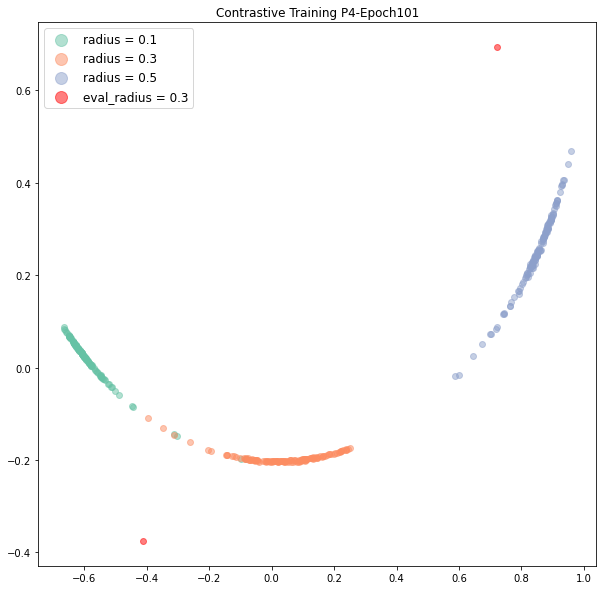

In [ ]:
embeds = []
labels = []
for file in glob.glob('embedding_vis/irm/seed_5P4120*.npy'):
    print(file)
    embedding = np.load(file, allow_pickle=True)
    embed = convert_cpu(embedding[()]['env_embeddings'])
    embed_dim = embed.shape[2]
    batch_num = embed.shape[1]
    embed = embed.reshape(-1, embed_dim)
    label = convert_cpu(embedding[()]['label_embeddings'])
    label = np.repeat(label, batch_num).reshape(label.shape[0]*batch_num,)
    embeds.append(embed)
    labels.append(label)
embeds = np.vstack(embeds)
labels = np.concatenate(labels)

pca_proj = pca.transform(embeds)
print(pca.explained_variance_ratio_)
cmap = cm.get_cmap('Set2')
fig, ax = plt.subplots(figsize=(10,10))
num_categories = 3
legends = [0.1, 0.3, 0.5]
for lab in range(num_categories):
    indices = labels==lab
    ax.scatter(pca_proj[indices,0],pca_proj[indices,1], c=np.array(cmap(lab)).reshape(1,4), label = 'radius = '+str(legends[lab]) ,alpha=0.5)

# add eval embedding
# eval_embedding = np.load('embedding_vis/eval_embedding/00.1.npy', allow_pickle=True)
# ev_embed = np.array(eval_embedding[()]['env_embeddings'])
# ev_embed_dim = ev_embed.shape[1]
# ev_embed = ev_embed.reshape(-1, ev_embed_dim)
pca_eval_proj = pca.transform(ev_embeds)
ax.scatter(pca_eval_proj[0],pca_eval_proj[1], c='red', label = 'eval_radius = 0.3' ,alpha=0.5)

ax.legend(fontsize='large', markerscale=2)
ax.set_title('Contrastive Training P4-Epoch101')
plt.show()

In [ ]:
eval_embedding = np.load('embedding_vis/eval_embedding/60.1.npy', allow_pickle=True)
ev_embed = np.array(eval_embedding[()]['env_embeddings'])
ev_embed_dim = ev_embed.shape[1]
ev_embed = ev_embed.reshape(-1, ev_embed_dim)

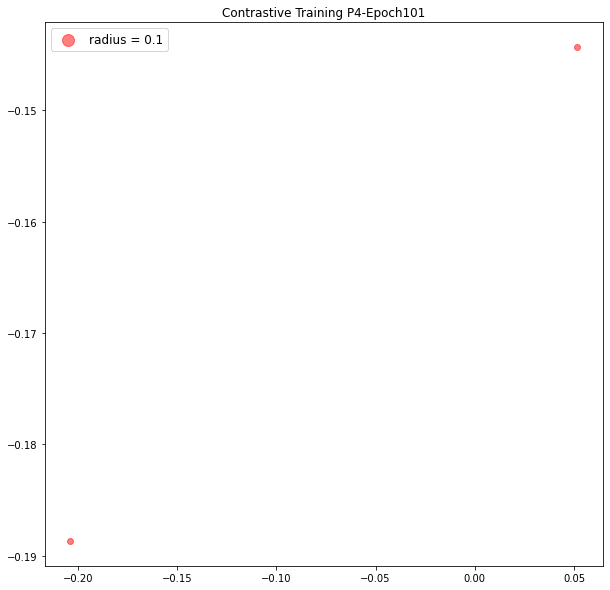

In [ ]:
eval_embedding
ev_embed = convert_cpu(embedding[()]['env_embeddings'])
ev_embed_dim = ev_embed.shape[2]
batch_num = ev_embed.shape[1]
ev_embed = ev_embed.reshape(-1, ev_embed_dim)
pca_eval_proj = pca.transform(ev_embed)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(pca_eval_proj[0],pca_eval_proj[1], c='red', label = 'radius = 0.1' ,alpha=0.5)
ax.legend(fontsize='large', markerscale=2)
ax.set_title('Contrastive Training P4-Epoch101')
plt.show()
plt.show()

In [ ]:
pca_eval_proj

array([[ 5.17472290e-02, -2.03983784e-01],
       [-1.44297242e-01, -1.88680679e-01],
       [-1.78380050e-02, -2.03406513e-01],
       [ 1.87915899e-02, -2.02313438e-01],
       [-4.97439206e-02, -2.00531363e-01],
       [ 7.46889934e-02, -2.00631395e-01],
       [ 7.60670304e-02, -2.01385498e-01],
       [-1.13541864e-01, -1.93346709e-01],
       [-1.41962826e-01, -1.90154254e-01],
       [ 9.30667967e-02, -2.01009512e-01],
       [ 3.86957079e-02, -2.01966584e-01],
       [ 1.63799837e-01, -1.91616490e-01],
       [ 4.39172201e-02, -2.04403609e-01],
       [ 6.36713877e-02, -2.00089127e-01],
       [ 1.22170240e-01, -1.96382344e-01],
       [ 9.27564800e-02, -2.01315075e-01],
       [ 1.61161855e-01, -1.93866730e-01],
       [-3.65157356e-03, -2.03156054e-01],
       [-7.01787993e-02, -1.99195206e-01],
       [-8.41150731e-02, -1.98783681e-01],
       [ 1.31237522e-01, -1.94557518e-01],
       [-1.26574844e-01, -1.91663340e-01],
       [ 1.26136869e-01, -1.96183860e-01],
       [ 1.